<a href="https://colab.research.google.com/github/DamodaraBarbosa/bank_customer_churn_prediction/blob/main/01_EDA_and_model_selection_of_bank_customers_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing `category-encoders` and `catboost`

In [78]:
!pip install category-encoders catboost

Importing libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import OneHotEncoder, TargetEncoder, CatBoostEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# 1. Load of dataset

In [80]:
df = pd.read_csv('/content/drive/MyDrive/Kaggle/Customer-Churn-Records.csv')

# Overview of data:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 2. About the data

From: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn/code?datasetId=3197960&sortBy=voteCount

> RowNumber—corresponds to the record (row) number and has no effect on the output.
>
>CustomerId—contains random values and has no effect on customer leaving the bank.
>
> Surname—the surname of a customer has no impact on their decision to leave the bank.
>
> CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
>
> Geography—a customer’s location can affect their decision to leave the bank.
>
> Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.
>
> Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
>
> Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
>
> Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
>
> NumOfProducts—refers to the number of products that a customer has purchased through the bank.
>
> HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
>
> IsActiveMember—active customers are less likely to leave the bank.
>
> EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
>
> Exited—whether or not the customer left the bank.
>
> Complain—customer has complaint or not.
>
> Satisfaction Score—Score provided by the customer for their complaint resolution.
>
> Card Type—type of card hold by the customer.
>
> Points Earned—the points earned by the customer for using credit card.

# 3. Information about the dataframe

## 3.1. Dataframe's shape

In [81]:
df.shape

(10000, 18)

> The dataframe consists of 10000 rows and 18 columns.

## 3.2. Data types

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

> Analyzing the information, it is possible to state that there is no missing data.

## 3.3. Presence of duplicate data

In [83]:
df.loc[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


> The presence of duplicate data in the dataframe is not detected.

# 4. Data processing

## 4.1. Drop of `RowNumber`, `CustomerId` and `Surname` columns

These columns are dropped as they do not contain data relevant to the

In [84]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis= 1)

# Overview of data after dropping columns:

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## 4.2. Rename of columns

In [85]:
columns_renamed = {
    'CreditScore': 'credit_score', 'Geography': 'geography', 'Gender': 'gender', 'Age': 'age', 'Tenure': 'tenure',
    'Balance': 'balance', 'NumOfProducts': 'num_of_products', 'HasCrCard': 'has_credit_card', 'IsActiveMember': 'is_active_member',
    'EstimatedSalary': 'estimated_salary', 'Exited': 'exited', 'Complain': 'complain', 'Satisfaction Score': 'satisfaction_score',
    'Card Type': 'card_type', 'Point Earned': 'point_earned'
}

In [86]:
df = df.rename(columns_renamed, axis= 1)

# Overview of dataframe with renamed columns:

df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# 5. Exploratory data analysis

## 5.1 Categorical variables

### 5.1.1. Gender

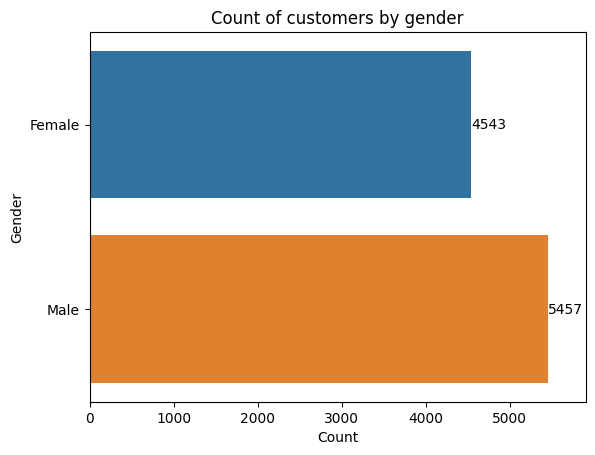

In [87]:
ax = sns.countplot(data= df, y= 'gender')
ax.set_title('Count of customers by gender')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Gender')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.9e3]) # set the limit of x-axis.
plt.show()

> There are more male than female customers in the dataset.

### 5.1.2. Geography

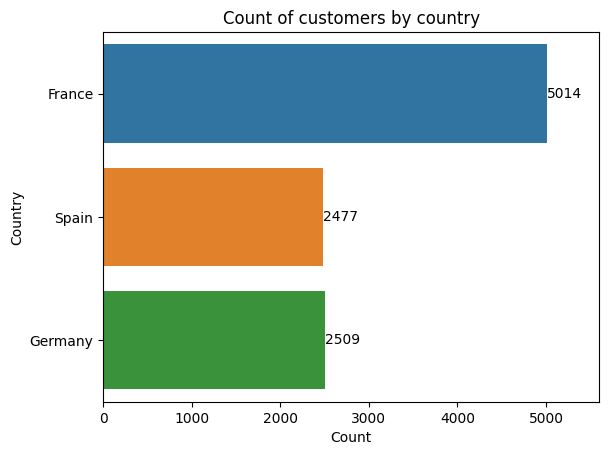

In [88]:
ax = sns.countplot(data= df, y= 'geography')
ax.set_title('Count of customers by country')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Country')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.6e3]) # set the limit of x-axis.
plt.show()

> There are customer data from three countries: France, Spain and Germany. The majority are from France.

### 5.1.3. Card type

In [89]:
df['card_type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

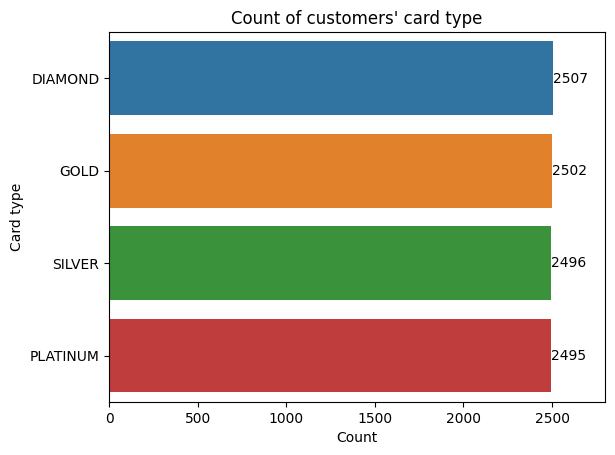

In [90]:
ax = sns.countplot(data= df, y= 'card_type')
ax.set_title("Count of customers' card type")

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Card type')
ax.set_xlabel('Count')
ax.set_xlim([0, 2.8e3]) # set the limit for x-axis.
plt.show()

> The distribution of card types is practically the same in the dataset.

### 5.1.4. Has credit card

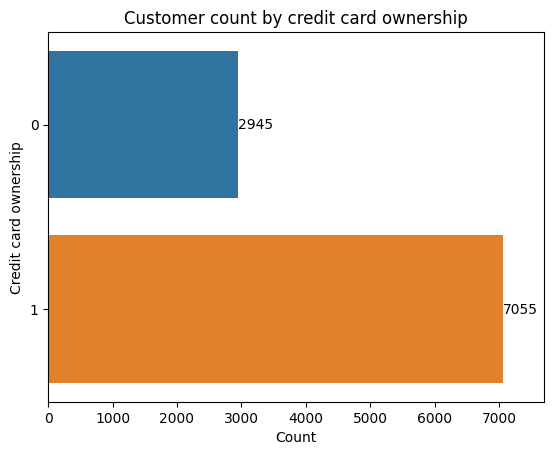

In [91]:
ax = sns.countplot(data= df, y= 'has_credit_card')
ax.set_title('Customer count by credit card ownership')

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_xlabel('Count')
ax.set_ylabel('Credit card ownership')
ax.set_xlim([0, 7.7e3]) # set the limit for x-axis.
plt.show()

> Most of the bank's customers, around 70.5%, have a credit card.

### 5.1.5. Is active member

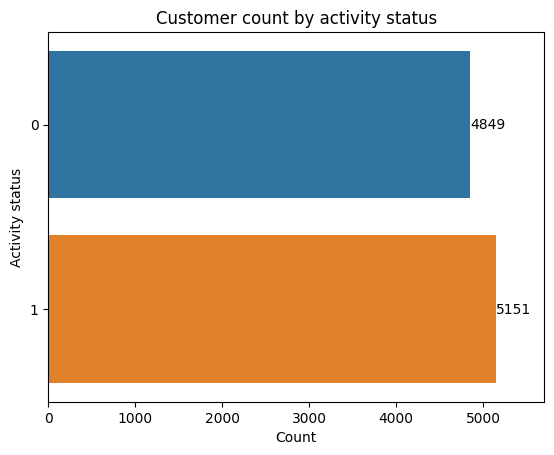

In [92]:
ax = sns.countplot(data= df, y= 'is_active_member')
ax.set_title('Customer count by activity status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Activity status')
ax.set_xlabel('Count')
ax.set_xlim([0, 5.7e3]) # set the limit for x-axis.
plt.show()

> Most of the bank's customers are active, but the difference is not so expressive.

### 5.1.6. Complain

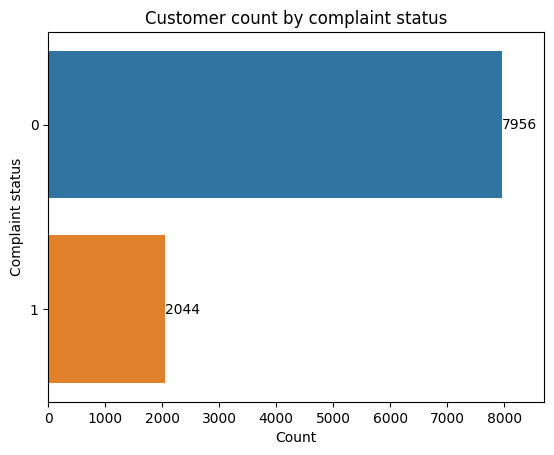

In [93]:
ax = sns.countplot(data= df, y= 'complain')
ax.set_title('Customer count by complaint status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Complaint status')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3]) # set the limit for x-axis.
plt.show()

> Only 2044 customers filed a complaint, this corresponds to 20.44% of customers.

## 5.2. Numeric variables

### 5.2.1. Frequency distribution of each numeric variable

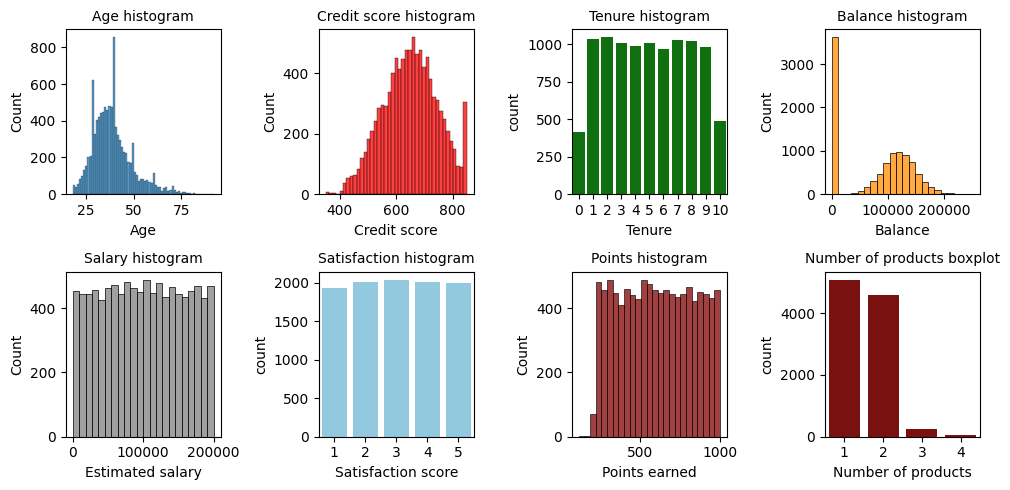

In [94]:
fig, ax = plt.subplots(2, 4, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'age', ax= ax[0, 0])
ax1.set_title('Age histogram',fontsize= 10)
ax1.set_xlabel('Age')
ax2 = sns.histplot(data= df, x= 'credit_score', color= 'r', ax= ax[0, 1])
ax2.set_title('Credit score histogram',fontsize= 10)
ax2.set_xlabel('Credit score')
ax3 = sns.countplot(data= df, x= 'tenure', color= 'g', ax= ax[0, 2])
ax3.set_title('Tenure histogram',fontsize= 10)
ax3.set_xlabel('Tenure')
ax4 = sns.histplot(data= df, x= 'balance', color= 'darkorange', ax= ax[0, 3])
ax4.set_title('Balance histogram',fontsize= 10)
ax4.set_xlabel('Balance')
ax5 = sns.histplot(data= df, x= 'estimated_salary', color= 'gray', ax= ax[1, 0])
ax5.set_title('Salary histogram',fontsize= 10)
ax5.set_xlabel('Estimated salary')
ax6 = sns.countplot(data= df, x= 'satisfaction_score', color= 'skyblue', ax= ax[1, 1])
ax6.set_title('Satisfaction histogram',fontsize= 10)
ax6.set_xlabel('Satisfaction score')
ax7 = sns.histplot(data= df, x= 'point_earned', color= 'maroon', ax= ax[1, 2])
ax7.set_title('Points histogram',fontsize= 10)
ax7.set_xlabel('Points earned')
ax8 = sns.countplot(data= df, x= 'num_of_products', color= 'darkred', ax= ax[1, 3])
ax8.set_title('Number of products boxplot', fontsize= 10)
ax8.set_xlabel('Number of products')
plt.tight_layout()
plt.show()

### 5.2.2. Boxplot of each numeric variable

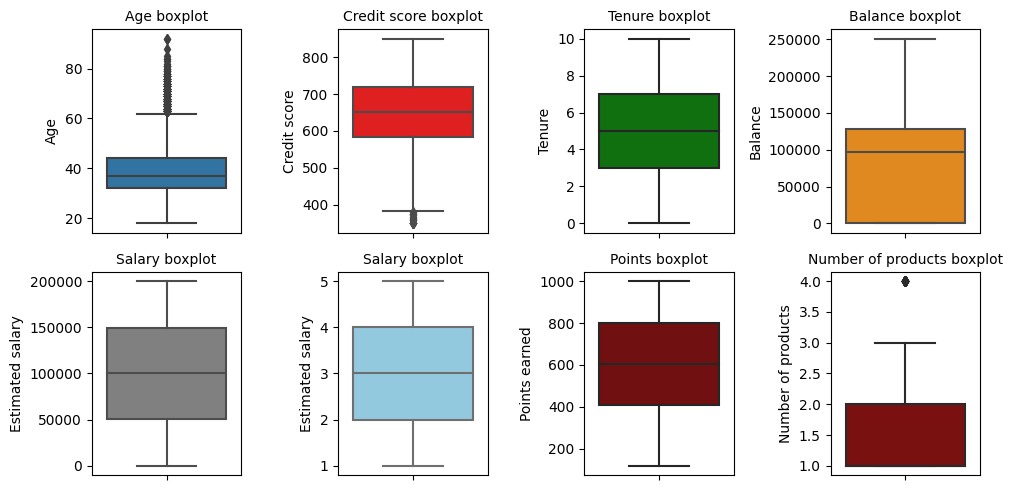

In [95]:
fig, ax = plt.subplots(2, 4, figsize= (10, 5))

ax1 = sns.boxplot(data= df, y= 'age', ax= ax[0, 0])
ax1.set_title('Age boxplot',fontsize= 10)
ax1.set_ylabel('Age')
ax2 = sns.boxplot(data= df, y= 'credit_score', color= 'r', ax= ax[0, 1])
ax2.set_title('Credit score boxplot',fontsize= 10)
ax2.set_ylabel('Credit score')
ax3 = sns.boxplot(data= df, y= 'tenure', color= 'g', ax= ax[0, 2])
ax3.set_title('Tenure boxplot',fontsize= 10)
ax3.set_ylabel('Tenure')
ax4 = sns.boxplot(data= df, y= 'balance', color= 'darkorange', ax= ax[0, 3])
ax4.set_title('Balance boxplot',fontsize= 10)
ax4.set_ylabel('Balance')
ax5 = sns.boxplot(data= df, y= 'estimated_salary', color= 'gray', ax= ax[1, 0])
ax5.set_title('Salary boxplot',fontsize= 10)
ax5.set_ylabel('Estimated salary')
ax6 = sns.boxplot(data= df, y= 'satisfaction_score', color= 'skyblue', ax= ax[1, 1])
ax6.set_title('Salary boxplot',fontsize= 10)
ax6.set_ylabel('Estimated salary')
ax7 = sns.boxplot(data= df, y= 'point_earned', color= 'maroon', ax= ax[1, 2])
ax7.set_title('Points boxplot',fontsize= 10)
ax7.set_ylabel('Points earned')
ax8 = sns.boxplot(data= df, y= 'num_of_products', color= 'darkred', ax= ax[1, 3])
ax8.set_title('Number of products boxplot', fontsize= 10)
ax8.set_ylabel('Number of products')
plt.tight_layout()
plt.show()

# 5.3. Analysis of the profile of customers who leave the bank

### 5.3.1 Exited

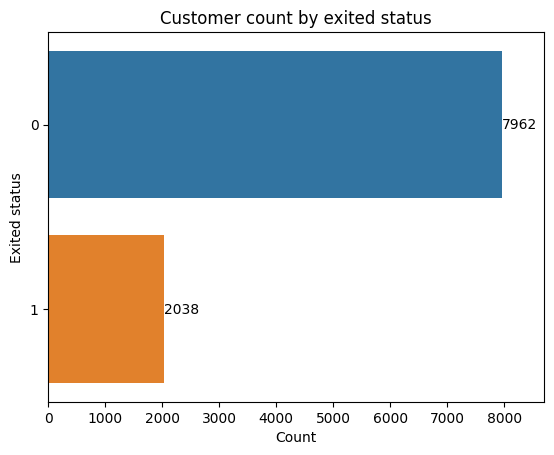

In [96]:
ax = sns.countplot(data= df, y= 'exited')
ax.set_title('Customer count by exited status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Exited status')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3]) # set the limit for x-axis.
plt.show()

> Customers who closed their bank accounts accounted for 20.38% of those in the dataset.

### Who closes more bank accounts, men or women?

In [97]:
# Exited customers data:

exited_customers = df.query('exited == 1')

# Exited customers dataframe overview:

exited_customers.head(3)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484


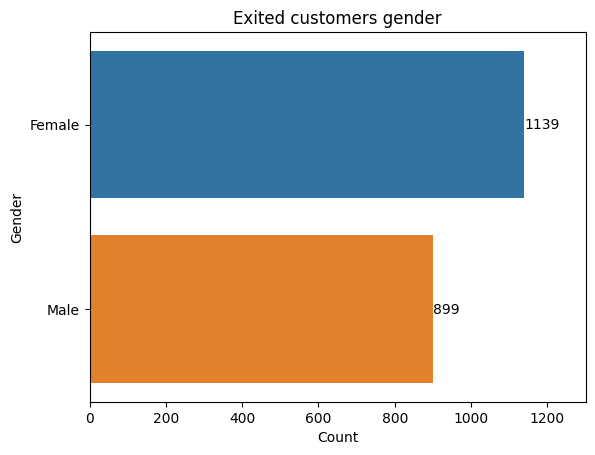

In [98]:
ax = sns.countplot(data= exited_customers, y= 'gender')
ax.set_title('Exited customers gender')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Gender')
ax.set_xlabel('Count')
ax.set_xlim([0, 1.3e3]) # set the limit for x-axis.
plt.show()

> Although there are fewer female customers in the dataset, they are the majority among customers who close their bank account.

### What is the age range of customers who close their accounts?

In [99]:
df.groupby('exited')['age'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
exited,,,
0,37.41,36.0,10.13
1,44.84,45.0,9.76


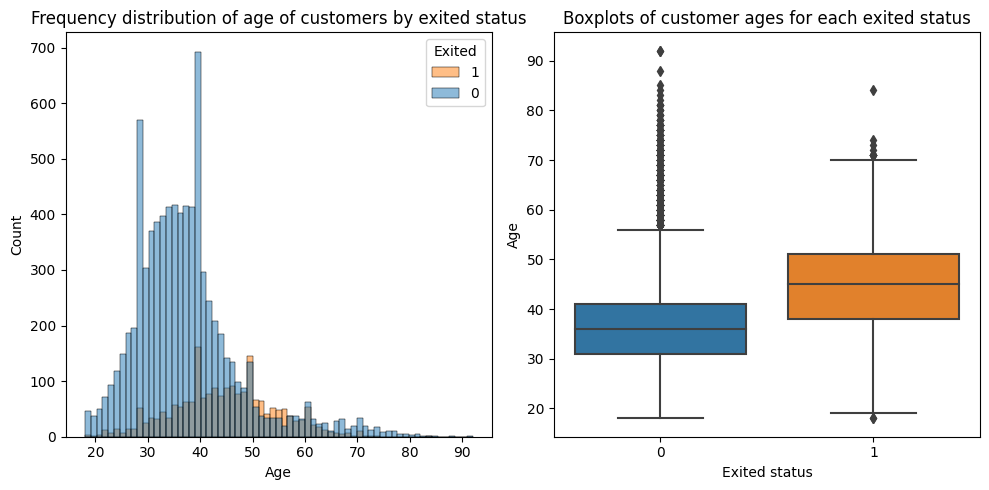

In [100]:
fig, ax = plt.subplots(1, 2, figsize= (10, 5))

ax1 = sns.histplot(data= df, x= 'age', hue= 'exited', ax= ax[0])
ax1.set_title('Frequency distribution of age of customers by exited status')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Age')
ax2 = sns.boxplot(data= df, y= 'age', x= 'exited', ax= ax[1])
ax2.set_title('Boxplots of customer ages for each exited status')
ax2.set_ylabel('Age')
ax2.set_xlabel('Exited status')
plt.tight_layout()
plt.show()

> It is possible to see that the age group of customers who close their accounts is more advanced, with an average of 45 years.

### Where are the customers who close their accounts?

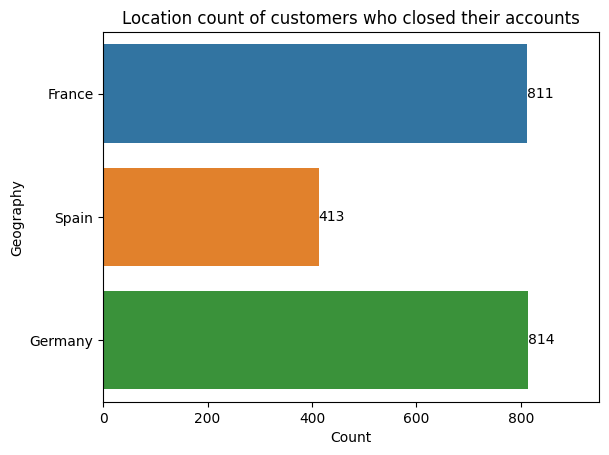

In [101]:
ax = sns.countplot(data= exited_customers, y= 'geography')
ax.set_title('Location count of customers who closed their accounts')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Geography')
ax.set_xlabel('Count')
ax.set_xlim([0, 9.5e2]) # set the limit for x-axis.
plt.show()

> France and Germany are the main locations among the clients that close their accounts the most, although most of the clients in the dataset are from France.

### Are members who close accounts active?

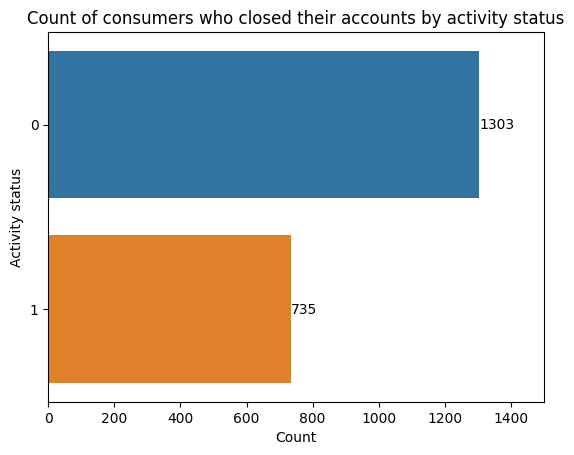

In [102]:
ax = sns.countplot(data= exited_customers, y= 'is_active_member')
ax.set_title('Count of consumers who closed their accounts by activity status')

# Set a label for each bar:

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Activity status')
ax.set_xlabel('Count')
ax.set_xlim([0, 1.5e3]) # set the limit for x-axis.
plt.show()

> Although non-active users are those who close accounts the most, of consumers who close their accounts, active users account for 36.04%.

### What is the estimated salary of those who close their account?

In [103]:
df.groupby('exited')['estimated_salary'].agg(['mean', 'median', 'std']).round(2)

,mean,median,std
exited,,,
0,99726.85,99620.36,57399.96
1,101509.91,102489.34,57932.62


> The earnings of customers who closed their bank accounts appear to be different from customers who remain with bank accounts.

However, are the distributions of these two samples statistically different?

In [104]:
# Samples:

still_customer = df.query('exited == 0')['estimated_salary']
exited_customer = df.query('exited == 1')['estimated_salary']

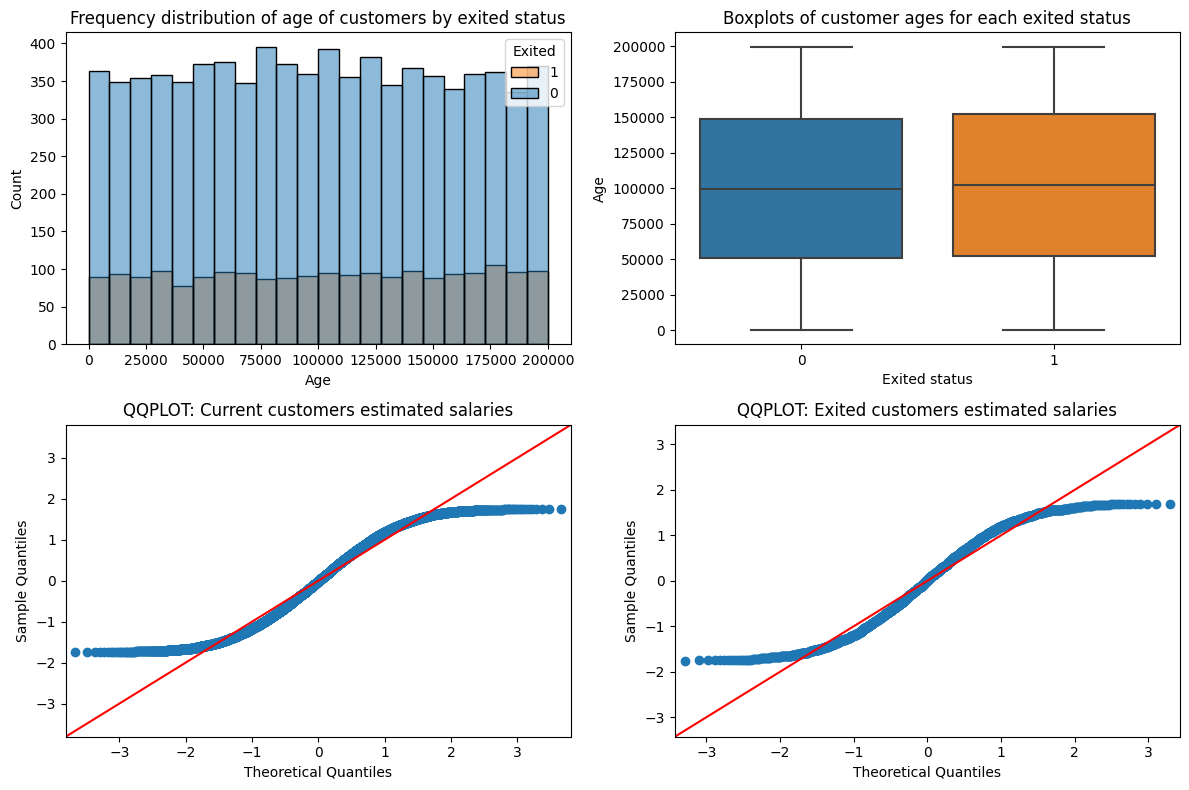

In [105]:
fig, ax = plt.subplots(2, 2, figsize= (12, 8))

ax1 = sns.histplot(data= df, x= 'estimated_salary', hue= 'exited', ax= ax[0, 0])
ax1.set_title('Frequency distribution of age of customers by exited status')
ax1.legend(title= 'Exited', labels= [1, 0])
ax1.set_xlabel('Age')
ax2 = sns.boxplot(data= df, y= 'estimated_salary', x= 'exited', ax= ax[0, 1])
ax2.set_title('Boxplots of customer ages for each exited status')
ax2.set_ylabel('Age')
ax2.set_xlabel('Exited status')
sm.qqplot(still_customer, line= '45', fit= True, ax= ax[1, 0]) # qqplot of data from current customers salaries.
ax[1,0].set_title('QQPLOT: Current customers estimated salaries') # set the first qqplot's title.
sm.qqplot(exited_customer, line= '45', fit= True, ax= ax[1, 1]) # qqplot of data from exited customers salaries.
ax[1, 1].set_title('QQPLOT: Exited customers estimated salaries') # set the second qqplot's title.
plt.tight_layout()
plt.show()

> Graphically, mainly through the histograms and QQplots, it is possible to notice that the data with the salary estimates of both samples **do not follow a normal distribution**.

Therefore, it is not appropriate to compare sample means, but their medians. In addition, it is appropriate to perform a non-parametric test, in this case the Mann-Whitney test, which compares the medians of the samples.

$Me_1 →$ Current customers estimated salaries median

$Me_2 →$ Exited customers estimated salaries median

> $H_0: Me_1 = Me_2$
>
> $H_1: Me_1 \neq Me_2$

In [106]:
stat, pvalue = mannwhitneyu(still_customer, exited_customer, alternative= 'two-sided')

In [107]:
print(f'Stat = {stat}')
print('='*30)
print(f'P-value = {pvalue}')

Stat = 7968250.0
P-value = 0.21235576456250627


$H_0$ hypothesis is rejected if $pvalue \leq α$.  Assuming that the significance level ($α$) is 5% (0.05):

In [108]:
pvalue <= 0.05

False

> There is no statistical evidence to reject the $H_0$ hypothesis. Therefore, the median salary of current customers and customers who have closed their accounts is assumed to be the same.

### Do complainers usually close their bank account?

In [109]:
complain_exited = pd.crosstab(df['complain'], df['exited'])

complain_exited

exited,0,1
complain,,
0,7952,4
1,10,2034


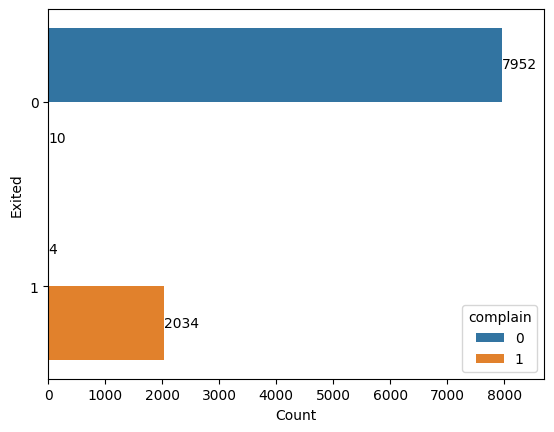

In [110]:
ax = sns.countplot(data= df, y= 'exited', hue= 'complain')
ax.set_title('')

for container in ax.containers:
  ax.bar_label(container, label_type= 'edge')

ax.set_ylabel('Exited')
ax.set_xlabel('Count')
ax.set_xlim([0, 8.7e3])
plt.show()

## 5.4. Correlation between the variables

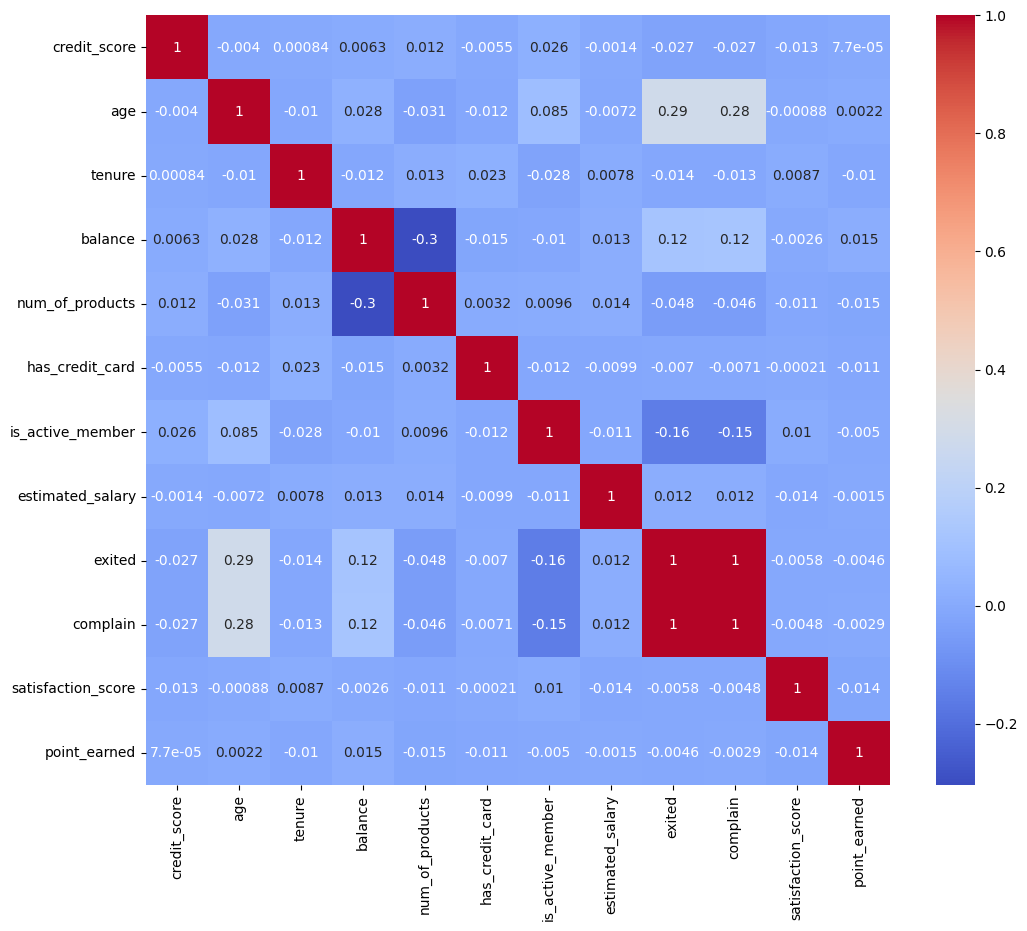

In [111]:
plt.figure(figsize= (12, 10))
sns.heatmap(data= df.corr(numeric_only=True), annot= True, cmap= 'coolwarm')
plt.show()

> **A perfect correlation** can be seen between the variable `complain` and the target variable. Therefore, this variable **will not be used** in the models that will be trained.

# 6. Classification model

## 6.1. Splitting data

In [112]:
# Data with independent variables:

X = df.drop(['complain', 'exited'], axis= 1) # due to the perfect correlation between the variable complain and the target variable, complain is eliminated.

# Data from target variable:

y = df['exited']

Since the dataset is relatively small, it is important to perform some kind of cross-validation to ensure that the proposed model is robust across the entire dataset.

> **StratifiedShuffleSplit** is a cross-validation technique that is often used to evaluate machine learning models when dealing with imbalanced datasets or when one wants to preserve the distribution of classes during data splitting.

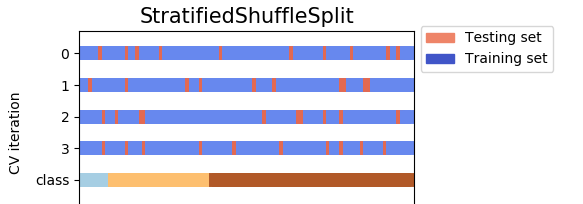

In [113]:
sss = StratifiedShuffleSplit(n_splits= 5, test_size= 0.2, random_state= 42)

## 6.2. Defining the pre-processing that will be done on the data

In [114]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [115]:
# Selecting numerical and categorical features to preprocessing:

non_scaled_numerical_features = ['age', 'tenure', 'balance', 'num_of_products', 'estimated_salary', 'satisfaction_score', 'point_earned']
categorical_features = ['geography', 'gender', 'card_type']

`ColumnTransformer` is a `scikit-learn` class that allows you to apply different transformations to specific columns of a dataset. This class is especially useful when we have **data with different types of features** (eg numeric columns, categorical columns) and we want to apply different transformations to each type of feature before training a machine learning model.

> The `ColumnTransformer` is capable of **grouping transformations** into a **single object that can be easily integrated into a data pre-processing pipeline.**

In [116]:
preprocessing = ColumnTransformer(
    transformers= [
        ('encoder', TargetEncoder(), categorical_features),
        ('scaler', MinMaxScaler(), non_scaled_numerical_features)
    ]
)

## 6.3. Executing the pipeline and testing different models

In [134]:
# Models that will be tested:

models = {
    'GaussianNB':  GaussianNB(),
    'SVC': SVC(),
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'CatBoostClassifier': CatBoostClassifier(verbose= False),
    'XGBoostClassifier': XGBClassifier(),
    'LGBMClassifier': LGBMClassifier()
}

The **scoring parameter** of the `cross_val_score` function is used to specify the **evaluation metric** that will be used during cross-validation to **evaluate the performance** of the model in each iteration. This metric is used to calculate the score of each trained model in each cross-validation fold.

> The chosen metric is the **F1-Score.** It is the harmonic mean of precision and recall, providing a single score that considers both true positive rate (recall) and positive predictive value (precision).

In [135]:
models_results = dict()

In [136]:
# The pipeline runs while the dictionary with the models is iterated over:

for model_name, model in models.items():
  pipeline = Pipeline([
      ('preprocessing', preprocessing),
      ('model', model)
  ])

  result = cross_val_score(pipeline, X, y, cv= sss, scoring= 'f1')

  # Each result is stored in the dictionary, with the name of the algorithm as key:

  models_results[model_name] = result.mean() # mean of results

## 6.4. Models evaluation

In [137]:
# A dataframe with scores of each model is instacied:

scores = pd.DataFrame({'Scores': models_results.values()}, index= models_results.keys())

# Styles a gradient based on values:

scores_heatmap = scores.style.background_gradient(cmap= 'coolwarm')

In [138]:
scores_heatmap

,Scores
GaussianNB,0.421127
SVC,0.250249
LogisticRegression,0.161690
KNeighborsClassifier,0.423555
DecisionTreeClassifier,0.472349
RandomForestClassifier,0.553433
GradientBoostingClassifier,0.558615
CatBoostClassifier,0.562583
XGBoostClassifier,0.552710
LGBMClassifier,0.567426


> Based on the defined pipeline, the best performing algorithm is the `LGBMClassifier`.

# 7. Conclusion

> * Dataframe information analysis was performed.
> * The data visualizations of the dataset were satisfactory in order to extract several insights.
> * The presence of nominal categorical data led to the need to use **Target Encoding.**
> * Due to the difference in scale between numerical data and because they do not follow a Gaussian distribution, it was necessary to use **MinMaxScaler normalization.**
> * The **worst performer**, regardless of assessment, was **the `LogisticRegression` model.**
> * **`RandomForestClassifier`, `GradientBoostingClassifier`, `CatBoostClassifier`, `XGBClassifier` and `LGBMClassifier`** are the models that **perform best with the data.**
> * However, **the best algorithm**, based on the chosen metric, is **`LGBMClassifier`.**